# Project: Store DataSet

# 🛍️ Store Sales Analysis Project

Welcome to this end-to-end data analysis project on store sales performance. In this notebook, we'll explore sales data and answer key business questions, including:

1. What are the top-selling products?
2. Which store has the highest total revenue?
3. Who are the top-performing employees by sales?
4. What are the most common customer buying patterns?
5. Are there any monthly or seasonal trends in sales?
6. What is the average revenue per customer and product category?
7. What is the sales conversion rate per store and employee?
8. How does employee count affect store performance?
9. What is the customer retention rate over time?
10. Are there regional differences in product preferences or sales trends?

We'll use Python with `pandas`, `matplotlib`, and `seaborn` for analysis and visualization.


## Data Wrangling

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import calendar

## Exploring And Assessing Data :

In [9]:
df1 = pd.read_csv('stores.csv')
df2 = pd.read_csv('products.csv')
df3 = pd.read_csv('customers.csv')
df4 = pd.read_csv('sales.csv')
df5 = pd.read_csv('employees.csv')

dataframes = {
    "stores":df1,
    "products":df2,
    "customers":df3,
    "sales":df4,
    "employees":df5
}

C:\Users\Eslam\AppData\Local\Temp\ipykernel_22032\1535926057.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('customers.csv')


In [10]:
# Preview the data
for name, df in dataframes.items():
    print(f" {name} Dataset Info")
    display(df.info())
    display(df.head(), "\n")

 stores Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store ID             35 non-null     int64  
 1   Country              35 non-null     object 
 2   City                 35 non-null     object 
 3   Store Name           35 non-null     object 
 4   Number of Employees  35 non-null     int64  
 5   ZIP Code             35 non-null     object 
 6   Latitude             35 non-null     float64
 7   Longitude            35 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.3+ KB


None

,Store ID,Country,City,Store Name,Number of Employees,ZIP Code,Latitude,Longitude
0,1,United States,New York,Store New York,6,10001,40.7128,-74.0060
1,2,United States,Los Angeles,Store Los Angeles,9,90001,34.0522,-118.2437
2,3,United States,Chicago,Store Chicago,7,60601,41.8781,-87.6298
3,4,United States,Houston,Store Houston,7,77001,29.7604,-95.3698
4,5,United States,Phoenix,Store Phoenix,5,85001,33.4484,-112.0740


'\n'

 products Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14950 entries, 0 to 14949
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product ID       14950 non-null  int64  
 1   Category         14950 non-null  object 
 2   Sub Category     14950 non-null  object 
 3   Description PT   14950 non-null  object 
 4   Description DE   14950 non-null  object 
 5   Description FR   14950 non-null  object 
 6   Description ES   14950 non-null  object 
 7   Description EN   14950 non-null  object 
 8   Description ZH   14950 non-null  object 
 9   Color            4568 non-null   object 
 10  Sizes            13225 non-null  object 
 11  Production Cost  14950 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.4+ MB


None

,Product ID,Category,Sub Category,Description PT,Description DE,Description FR,Description ES,Description EN,Description ZH,Color,Sizes,Production Cost
0,1,Feminine,Coats and Blazers,Esportivo Veludo Verde Com Botões,Sport Samt Sport Mit Knöpfen,Sports Velvet Sports Avec Des Boutons,Deportes De Terciopelo Con Botones,Sports Velvet Sports With Buttons,运动天鹅绒运动与按钮,NaN,S|M|L|XL,41.68
1,2,Feminine,Sweaters and Knitwear,Luxuoso Denim Rosa Com Botões,Luxuriöser Rosa Jeans Mit Knöpfen,Léchard De Denim Rose Avec Boutons,Denim Rosa Lujoso Con Botones,Luxurious Pink Denim With Buttons,豪华的粉红色牛仔布和纽扣,PINK,S|M|L|XL,15.07
2,3,Feminine,Dresses and Jumpsuits,Retrô Tricot Preto Estampado,Black Tricot Gedruckter Tricot,Tricot Imprimé En Tricot Noir,Tricot Negro Tricot Impreso,Black Tricot Printed Tricot,黑色三角形印刷三角形,BLACK,S|M|L,19.56
3,4,Feminine,Shirts and Blouses,Blusa De Algodão Básica,Basis -Baumwollbluse,Chemisier En Coton De Base,Blusa De Algodón,Basic Cotton Blouse,基本的棉衬衫,NaN,S|M|L|XL,14.62
4,5,Feminine,T-shirts and Tops,T-Shirt Básica De Algodão,Basis-Baumwoll-T-Shirt,T-Shirt En Coton De Base,Camiseta Básica De Algodón,Basic Cotton T-Shirt,基本棉T恤,NaN,S|M|L|XL,7.80


'\n'

 customers Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643306 entries, 0 to 1643305
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Customer ID    1643306 non-null  int64 
 1   Name           1643306 non-null  object
 2   Email          1643306 non-null  object
 3   Telephone      1643306 non-null  object
 4   City           1643306 non-null  object
 5   Country        1643306 non-null  object
 6   Gender         1643306 non-null  object
 7   Date Of Birth  1643306 non-null  object
 8   Job Title      1059517 non-null  object
dtypes: int64(1), object(8)
memory usage: 112.8+ MB


None

,Customer ID,Name,Email,Telephone,City,Country,Gender,Date Of Birth,Job Title
0,1,Danny Hardy,danny.hardy@fake_gmail.com,342-292-3537x5673,New York,United States,M,1983-07-09,Archivist
1,2,Billy Cook,billy.cook@fake_yahoo.com,773.926.3876x7631,New York,United States,M,1997-09-21,Comptroller
2,3,Monica Jackson,monica.jackson@fake_hotmail.com,221-885-6712x5233,New York,United States,F,1992-10-13,Water quality scientist
3,4,Sarah Carroll,sarah.carroll@fake_gmail.com,(930)802-0827x95958,New York,United States,F,1979-07-08,"Engineer, electrical"
4,5,Dana Gardner,dana.gardner@fake_yahoo.com,903.642.1893x4599,New York,United States,F,1970-07-11,IT technical support officer


'\n'

 sales Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269674 entries, 0 to 6269673
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Invoice ID       object 
 1   Line             int64  
 2   Customer ID      int64  
 3   Product ID       int64  
 4   Size             object 
 5   Color            object 
 6   Unit Price       float64
 7   Quantity         int64  
 8   Date             object 
 9   Discount         float64
 10  Line Total       float64
 11  Store ID         int64  
 12  Employee ID      int64  
 13  Currency         object 
 14  Currency Symbol  object 
 15  SKU              object 
 16  Payment Method   object 
 17  Invoice Total    float64
dtypes: float64(4), int64(6), object(8)
memory usage: 861.0+ MB


None

,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Currency,Currency Symbol,SKU,Payment Method,Invoice Total
0,INV-US-001-04128642,1,268,1130,M,NEUTRAL,59.0,1,2023-01-01 20:23:00,0.4,35.4,1,5,USD,$,MACO1130-M-NEUTRAL,Cash,144.9
1,INV-US-001-04128642,2,268,1694,M,NaN,34.5,1,2023-01-01 20:23:00,0.4,20.7,1,5,USD,$,FESH1694-M-,Cash,144.9
2,INV-US-001-04128642,3,268,35,S,NaN,29.0,1,2023-01-01 20:23:00,0.4,17.4,1,5,USD,$,FESP35-S-,Cash,144.9
3,INV-US-001-04128642,4,268,1340,M,GREEN,25.5,1,2023-01-01 20:23:00,0.4,15.3,1,5,USD,$,MAT-1340-M-GREEN,Cash,144.9
4,INV-US-001-04128642,5,268,2202,M,NaN,24.5,1,2023-01-01 20:23:00,0.4,14.7,1,5,USD,$,MASP2202-M-,Cash,144.9


'\n'

 employees Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Employee ID  264 non-null    int64 
 1   Store ID     264 non-null    int64 
 2   Name         264 non-null    object
 3   Position     264 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.4+ KB


None

,Employee ID,Store ID,Name,Position
0,1,1,Jesus Jacobs,Manager
1,2,1,Gabriel Cunningham,Seller
2,3,1,Timothy Fernandez,Seller
3,4,1,Natalie Rogers,Seller
4,5,1,Elizabeth Cantrell,Seller


'\n'

In [11]:
for name,df in dataframes.items():
    print(f"{name} Data Set")
    print(df.isnull().sum(), "\n")

stores Data Set
Store ID               0
Country                0
City                   0
Store Name             0
Number of Employees    0
ZIP Code               0
Latitude               0
Longitude              0
dtype: int64 

products Data Set
Product ID             0
Category               0
Sub Category           0
Description PT         0
Description DE         0
Description FR         0
Description ES         0
Description EN         0
Description ZH         0
Color              10382
Sizes               1725
Production Cost        0
dtype: int64 

customers Data Set
Customer ID           0
Name                  0
Email                 0
Telephone             0
City                  0
Country               0
Gender                0
Date Of Birth         0
Job Title        583789
dtype: int64 

sales Data Set
Invoice ID               0
Line                     0
Customer ID              0
Product ID               0
Size                440622
Color              4367076
Unit Pric

# Cleaning Data

## Cleaning Steps:

### Quality :

1- Droping Some unnecessary Columns

2- Filling NaN Values in Some Columns 

3- Converting Some Columns to Corrected Data Types

4-Making new columns and choose USD Currncy only in all Sales

In [29]:
df1.drop(['Longitude', 'Latitude', 'ZIP Code'], axis=1, inplace=True)

In [30]:
df2.drop(['Description PT', 'Description DE', 'Description FR', 'Description ES', 'Description ZH', 'Color'], axis=1, inplace=True)

In [31]:
df3.drop('Job Title', axis=1, inplace=True)

In [32]:
df4.drop(['Currency Symbol', 'Color', 'Date', 'Currency', 'SKU', 'Invoice Total'], axis=1, inplace=True)

In [13]:
df2['Sizes'] = df2['Sizes'].fillna(value= df2['Sizes'].mode())

In [14]:
df2['Production Cost'] = df2['Production Cost'].astype(int).round(2)

In [15]:
df3['Date Of Birth']= pd.to_datetime(df3['Date Of Birth'])

In [16]:
df4['Date'] = pd.to_datetime(df4['Date'])

C:\Users\Eslam\AppData\Local\Temp\ipykernel_22032\988866886.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df4['Date'] = pd.to_datetime(df4['Date'])


In [17]:
df4['Month'] = df4['Date'].dt.month

In [18]:
df4['year'] = df4['Date'].dt.year

In [19]:
df4['Month_Year'] = df4['Date'].dt.to_period('M')

In [28]:
df4['Sales_USD'] = df4['Sales_USD'].round(2)

In [21]:
df4['Size'] = df4['Size'].fillna(value = df4['Size'].mode()[0])

In [27]:
# Step 1: Define conversion rates to USD
conversion_rates = {
    'USD': 1.00, # Base currency
    'EUR': 1.08,
    'CNY': 0.14,
    'GBP': 1.26
}

# Convert To USD
df4['Sales_USD'] = df4.apply(
    lambda row: row['Invoice Total'] * conversion_rates.get(row['Currency'], 1),
    axis=1
)

# Answering Questions And Visuliztion

## 1. What are the top-selling products?

In [77]:
df_products = dataframes['products']
df_sales = dataframes['sales']

prod_Total_sales = df_sales.groupby('Product ID')['Sales_USD'].sum()
top_10_products = prod_Total_sales.sort_values(ascending=False).head(10).reset_index()

product_desc = df_products.merge(top_10_products, on='Product ID')

top10_with_desc = product_desc[["Description EN","Sales_USD"]]

print(top10_with_desc)

                                      Description EN  Sales_USD
0          Short -Sleeved Blouse Set And Twill Skirt  130246.27
1  Male Fact Slim Fit With Combined Fabric And St...  133476.05
2             Tricot Blouse Set And Pantacourt Pants  129291.45
3  Slim Fit Men'S Blazer With Zipper And Lapela D...  133683.52
4       Male Fact With Adjustable Waist Cord Details  129417.41
5    Men'S Blazer With Zipper Details On The Sleeves  131289.27
6                     Set Of Blouse And Tricot Pants  133670.27
7  Male Fact With Youth Style And Functional Pockets  131083.99
8  Men'S Blazer With Zipper Details Hidden On The...  130581.32
9                Men'S Silk Blazer For Formal Dinner  130605.82


## 2. Which store has the highest total revenue?

In [78]:
df_stores = dataframes['stores']
df_sales = dataframes['sales']

grouping = df_sales.groupby('Store ID')['Sales_USD'].sum()

top_store_id = grouping.idxmax()
top_store = grouping.max()

top_store_name = df_stores[df_stores['Store ID'] == top_store_id]['Store Name'].values[0]


print(f"Top Store Name : {top_store_name} (Store ID : {top_store_id}) With Total Sales : {top_store}")

Top Store Name : Store 上海 (Store ID : 6) With Total Sales : 45068457.77


## 3. Who are the top-performing employees by sales?

In [79]:
df_sales = dataframes['sales']
df_employees = dataframes['employees']

grouping_dfs = df_sales.groupby('Employee ID')['Sales_USD'].sum()

top_5_employees = grouping_dfs.sort_values(ascending=False).head(5)

merged = df_employees.merge(top_5_employees, on="Employee ID")

Name = merged["Name"]
Position = merged['Position']

print("Top 5 Employees by Sales:\n")
for idx, row in merged.iterrows():
    print(f"{row['Name']} — {row['Position']} — ${row['Sales_USD']:,.2f}")

Top 5 Employees by Sales:

Gabriel Cunningham — Seller — $8,611,761.57
Timothy Fernandez — Seller — $8,420,442.28
Natalie Rogers — Seller — $8,340,429.03
Elizabeth Cantrell — Seller — $8,253,714.28
Melissa Tran — Seller — $8,379,909.94


## 4. What are the most common customer buying patterns?

In [85]:
df_costumer = dataframes['customers']
df_sales = dataframes['sales']

sum_grouping = df_sales.groupby('Customer ID')['Sales_USD'].sum()
count_grouping = df_sales.groupby('Customer ID')['Sales_USD'].count()

sum_top_5_costumers = sum_grouping.sort_values(ascending=False).head(5)
count_top_5_costumers = count_grouping.sort_values(ascending=False).head(5)

sum_merging_name = df_costumer.merge(sum_top_5_costumers, on='Customer ID')
#count_merging_name = df_costumer.merge(count_top_5_costumers, on = 'Customer ID')

sum_name = sum_merging_name['Name']

print("Top 5 Buying Costumers :\n")
for idx, row in sum_merging_name.iterrows():
    count = count_grouping.loc[row['Customer ID']]
    print(f"{row['Name']} - Total Purchases: ${row['Sales_USD']} - With Number Of Purchases: {count}")

Top 5 Buying Costumers :

Megan Williams - Total Purchases: $12541.83 - With Number Of Purchases: 47
Kristine Robertson - Total Purchases: $11698.7 - With Number Of Purchases: 40
李玉梅 - Total Purchases: $11843.92 - With Number Of Purchases: 41
高楠 - Total Purchases: $11059.25 - With Number Of Purchases: 39
许洁 - Total Purchases: $11228.55 - With Number Of Purchases: 30


## 5. Are there any monthly or seasonal trends in sales?

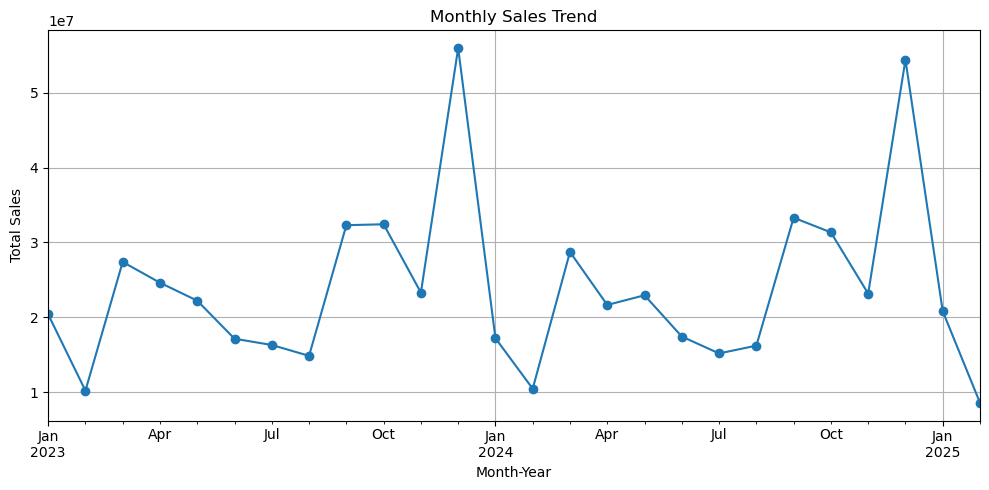

In [94]:
df_sales = dataframes['sales']

monthly_sales  = df_sales.groupby('Month_Year')['Sales_USD'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

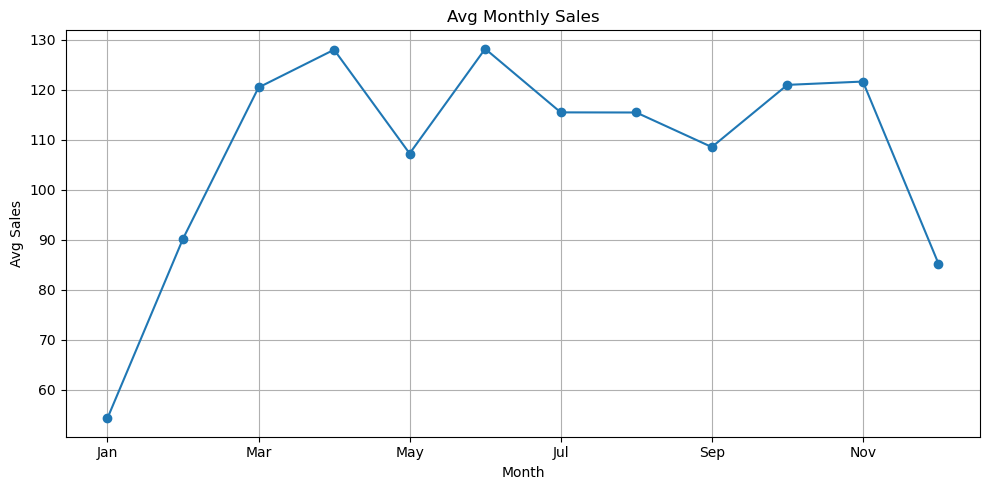

In [100]:
df_sales = dataframes['sales']

monthly_sales  = df_sales.groupby('Month')['Sales_USD'].mean()

monthly_sales.index = monthly_sales.index.map(lambda x: calendar.month_abbr[x])

monthly_sales.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Avg Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Avg Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. What is the average revenue per customer and per product category?


In [110]:
df_sales = dataframes['sales']
df_products = dataframes['products']

avg_costumer = df_sales.groupby('Customer ID')['Sales_USD'].sum().mean()
avg_revenue_per_customer = avg_costumer.round(2)

merging = df_sales.merge(df_products, on='Product ID')
avg_revenue_per_category = merging.groupby('Sub Category')['Sales_USD'].mean()
top_3 = avg_revenue_per_category.sort_values(ascending=False).head(3).round(2)

print("Average revenue per customer:", avg_revenue_per_customer)
print("Average revenue per category:",top_3)

Average revenue per customer: 476.7
Average revenue per category: Sub Category
Suits and Blazers    149.38
Suits and Sets       146.96
Coats and Blazers    116.93
Name: Sales_USD, dtype: float64


## 7. What is the sales conversion rate per store or employee?


In [118]:
df_sales= dataframes['sales']
df_employees = dataframes['employees']
df_stores = dataframes['stores']

store_merging = df_sales.merge(df_stores, on="Store ID")
employee_merging = df_sales.merge(df_employees, on="Employee ID")

#Working on Store With Sales :
sales_per_store = df_sales.groupby('Store ID')['Sales_USD'].sum()
top7 = sales_per_store.sort_values(ascending=False).head(7)
merge_store_name = df_stores.merge(top7, on="Store ID")

#Working On Store With Employees :
sales_per_employee = df_sales.groupby('Employee ID')['Sales_USD'].sum()
top7_Employee = sales_per_employee.sort_values(ascending=False).head(7)
merge_employee_name = df_employees.merge(top7_Employee, on='Employee ID')

# Printing:
print("Top 7 Stores by Revenue:")
for idx, row in merge_store_name.iterrows():
    print(f"{row['Store Name']} — ${row['Sales_USD']:,.2f}")  # ✅ use 'Store Name'

print("\nTop 7 Employees by Revenue:")
for idx, row in merge_employee_name.iterrows():
    print(f"{row['Name']} — ${row['Sales_USD']:,.2f}")  # ✅ use 'Employee Name'


Top 7 Stores by Revenue:
Store New York — $42,006,257.10
Store Los Angeles — $38,163,148.15
Store Chicago — $28,677,030.38
Store Phoenix — $29,988,941.79
Store 上海 — $45,068,457.77
Store 北京 — $39,462,949.73
Store 深圳 — $34,079,993.31

Top 7 Employees by Revenue:
Gabriel Cunningham — $8,611,761.57
Timothy Fernandez — $8,420,442.28
Natalie Rogers — $8,340,429.03
Elizabeth Cantrell — $8,253,714.28
Melissa Tran — $8,379,909.94
Stephanie Williams — $7,516,252.74
Suzanne Higgins — $7,542,963.38


## 8. How does employee count affect store performance?

In [120]:
df1['Number of Employees'].value_counts()

Number of Employees
9     10
7      7
5      7
10     4
8      4
6      3
Name: count, dtype: int64

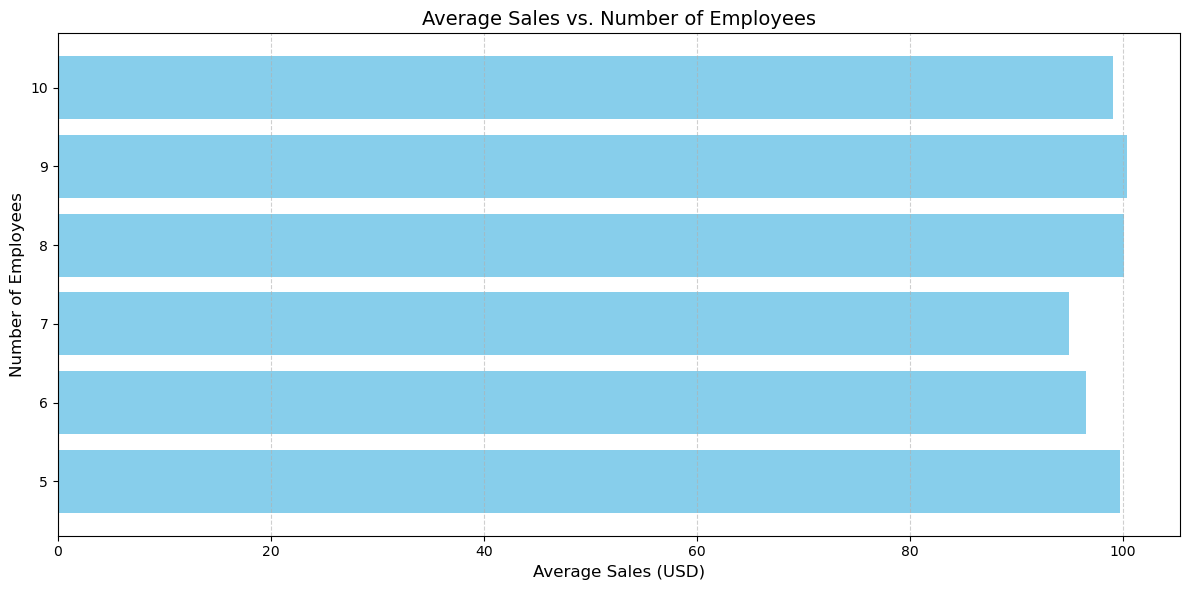

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

df_stores = dataframes['stores']
df_sales = dataframes['sales']

# Merge sales and store data
merged = df_sales.merge(df_stores, on='Store ID')

# Group by number of employees to get average sales per group
grouped = merged.groupby('Number of Employees')['Sales_USD'].mean().reset_index()
grouped = grouped.sort_values(by='Sales_USD', ascending=True)

# Plot
plt.figure(figsize=(12, 6))  # Larger figure to prevent layout issues

plt.barh(grouped['Number of Employees'], grouped['Sales_USD'], color='skyblue')
plt.title('Average Sales vs. Number of Employees', fontsize=14)
plt.xlabel('Average Sales (USD)', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## 9. What is the customer retention rate over time?

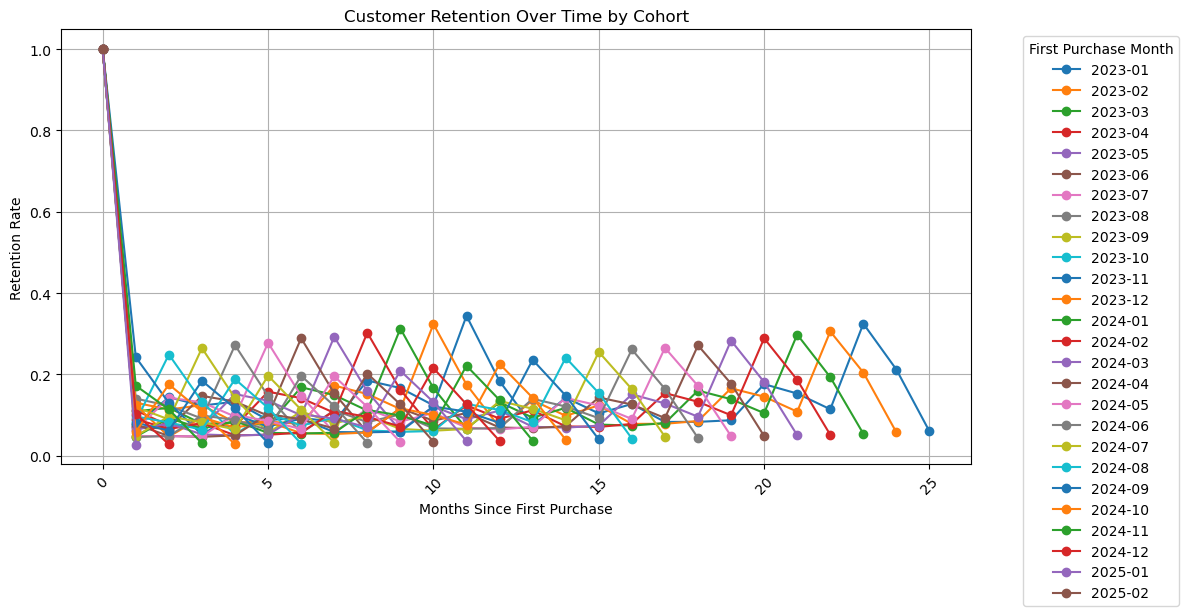

In [146]:
df_sales = dataframes['sales']


# Step 3: Get first purchase month for each customer
first_purchase = df_sales.groupby('Customer ID')['Month_Year'].min().reset_index()
first_purchase.columns = ['Customer ID', 'First_Month']

# Step 4: Merge it back to sales data
df_sales = df_sales.merge(first_purchase, on='Customer ID')

# Step 5: Calculate Cohort Index (difference in months from first purchase)
df_sales['Cohort_Index'] = (df_sales['Month_Year'] - df_sales['First_Month']).apply(lambda x: x.n)

# Step 6: Build retention table
cohort_data = df_sales.groupby(['First_Month', 'Cohort_Index'])['Customer ID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='First_Month', columns='Cohort_Index', values='Customer ID')

plt.figure(figsize=(12, 6))

# Plot each cohort's retention line
for index in retention.index:
    plt.plot(retention.columns, retention.loc[index], marker='o', label=str(index))

plt.title('Customer Retention Over Time by Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Retention Rate')
plt.legend(title='First Purchase Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## 10. Are there any regional differences in product preferences or sales trends?

In [157]:
df_stores = dataframes['stores']
df_sales = dataframes['sales']
df_products = dataframes['products']

merging = df_sales.merge(df_stores, on='Store ID').merge(df_products, on='Product ID')
merging['Sales_USD'] = pd.to_numeric(merging['Sales_USD'], errors='coerce')

grouping = merging.groupby(['City', 'Sub Category'])['Sales_USD'].sum().reset_index()

pivot  = grouping.pivot(index='City', columns='Sub Category', values='Sales_USD').fillna(0)

print(pivot)

Sub Category       Accessories  Baby (0-12 months)      Coats  \
City                                                            
Barcelona            622272.49           168648.66  213678.80   
Berlin              1051321.01           279925.42  369649.18   
Birmingham           251046.70            64889.96   86222.72   
Braga                453779.24           128989.87  141303.93   
Bristol              375965.77            93937.06  112364.91   
Chicago             1353898.60           381757.19  487408.10   
Coimbra              249428.03            67009.11   86776.36   
Frankfurt am Main    394269.65           103597.65  132637.58   
Glasgow              334178.93            85266.99  110458.34   
Guimarães            478514.75           119045.55  167193.98   
Hamburg              858542.12           235878.67  291350.78   
Houston             1330747.44           341845.28  427933.10   
Köln                 724146.07           187093.07  234090.61   
Lisboa               8257

C:\Users\Eslam\AppData\Local\Temp\ipykernel_400\813658573.py:10: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  plt.tight_layout()
C:\Users\Eslam\AppData\Local\Temp\ipykernel_400\813658573.py:10: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
  plt.tight_layout()
C:\Users\Eslam\AppData\Local\Temp\ipykernel_400\813658573.py:10: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from current font.
  plt.tight_layout()
C:\Users\Eslam\AppData\Local\Temp\ipykernel_400\813658573.py:10: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
  plt.tight_layout()
C:\Users\Eslam\AppData\Local\Temp\ipykernel_400\813658573.py:10: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from current font.
  plt.tight_layout()
C:\Users\Eslam\AppData\Local\Temp\ipykernel_400\813658573.py:10: UserWarning: Glyph 22323 (\N{CJK UNIFIED IDEOGRAPH-5733}) missing from current f

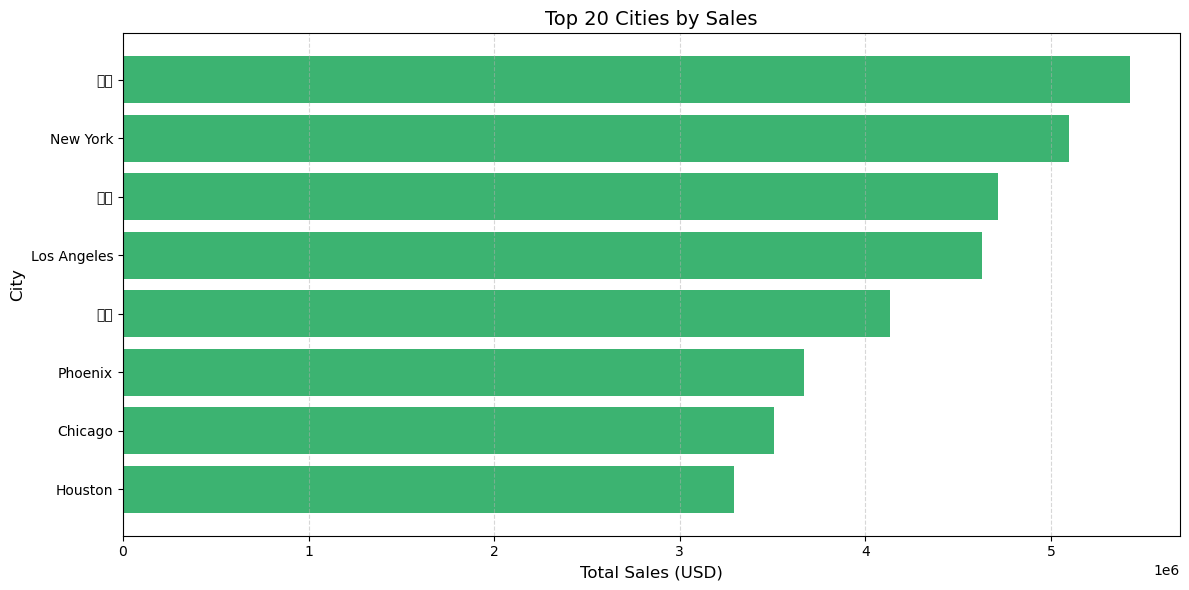

In [158]:
top_20_cities = grouping.sort_values(ascending=False , by ='Sales_USD').head(20)
# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_20_cities['City'], top_20_cities['Sales_USD'], color='mediumseagreen')
plt.title('Top 20 Cities by Sales', fontsize=14)
plt.xlabel('Total Sales (USD)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.gca().invert_yaxis()  # Highest sales at top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 11. top 10 Employee Making Sales

In [163]:
df_sales = dataframes['sales']
df_employees = dataframes['employees']

total_sales_per_employee = df_sales.groupby('Employee ID')['Sales_USD'].sum()

top_10 = total_sales_per_employee.sort_values(ascending=False).head(10)

merge_name = df_employees.merge(top_10, on='Employee ID')

employee = merge_name[['Name','Sales_USD']]
print(employee)

                         Name   Sales_USD
0          Gabriel Cunningham  8611761.57
1           Timothy Fernandez  8420442.28
2              Natalie Rogers  8340429.03
3          Elizabeth Cantrell  8253714.28
4                Melissa Tran  8379909.94
5          Stephanie Williams  7516252.74
6             Suzanne Higgins  7542963.38
7               Sandra Wright  7459471.29
8              Robert Jackson  7470254.38
9  Chelo Clotilde García Seco  5933795.35


## Conclusion :

1- I Concluded The Top 10 Selling Products

2- Concluded the top Selling Store with total sales : 45068457

3- Concluded Top 5 Employees With Top Selling 

4- Concluded top 5 costumers with the most number of purchase

5- Concluded The Monthly and the Yearly trends 

6- Concluded average revenue per customer and per product category

7- Concluded The top 7 revenue per store employee

8- Concluded that number of Employees per store Don't dirctly affect in store preformance

9- Concluded Top 10 Employees Making Salles